In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pyodbc

     ---------------------------------------- 69.6/69.6 KB 4.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\nikhi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import pyodbc

conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=SIHAYA\SQLEXPRESS;"
    "Database=customer_churn_db;"
    "Trusted_Connection=yes;"
)

query = "SELECT * FROM Telco_customer_churn"
df = pd.read_sql(query, conn)

df.head()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16128\2086077057.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,0002-ORFBO,1,United States,California,Frazier Park,93225,"34.827662, -118.999073",34.827663,-118.999069,Female,...,One year,Yes,Mailed check,65.6,593.30,No,0,65,2205,None
1,0003-MKNFE,1,United States,California,Glendale,91206,"34.162515, -118.203869",34.162514,-118.203873,Male,...,Month-to-month,No,Mailed check,59.9,542.40,No,0,66,5414,None
2,0004-TLHLJ,1,United States,California,Costa Mesa,92627,"33.645672, -117.922613",33.645672,-117.922615,Male,...,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,1,71,4479,Price too high
3,0011-IGKFF,1,United States,California,Martinez,94553,"38.014457, -122.115432",38.014458,-122.115433,Male,...,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,1,99,3714,Product dissatisfaction
4,0013-EXCHZ,1,United States,California,Camarillo,93010,"34.227846, -119.079903",34.227844,-119.079903,Female,...,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,1,68,3464,Network reliability


In [5]:
df.shape

(7043, 33)

In [6]:
total = len(df)
churned = df['Churn_Value'].sum()

churn_rate = (churned / total) * 100

print("Total Customers:", total)
print("Churned:", churned)
print("Churn Rate:", round(churn_rate,2), "%")

Total Customers: 7043
Churned: 1869
Churn Rate: 26.54 %


In [7]:
contract_analysis = df.groupby('Contract')['Churn_Value'].agg(['count','sum'])
contract_analysis['Churn_%'] = (contract_analysis['sum'] / contract_analysis['count']) * 100

contract_analysis.sort_values(by='Churn_%', ascending=False)

,count,sum,Churn_%
Contract,,,
Month-to-month,3875,1655,42.709677
One year,1473,166,11.269518
Two year,1695,48,2.831858


In [8]:
revenue_loss = df[df['Churn_Value'] == 1]['Monthly_Charges'].sum()

print("Monthly Revenue Loss:", round(revenue_loss,2))

Monthly Revenue Loss: 139130.85


In [9]:
high_risk = df[
    (df['Contract'] == 'Month-to-month') &
    (df['Monthly_Charges'] > 70) &
    (df['Tenure_Months'] < 12)
]

high_risk[['CustomerID','Monthly_Charges','Tenure_Months','Churn_Score']].head()

,CustomerID,Monthly_Charges,Tenure_Months,Churn_Score
2,0004-TLHLJ,73.90,4,71
4,0013-EXCHZ,83.90,3,68
17,0021-IKXGC,72.10,1,50
54,0094-OIFMO,95.00,11,85
64,0107-YHINA,99.75,1,93


In [10]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Count,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Value,Churn_Score,CLTV
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,NaN,1.000000,-0.876779,-0.001632,-0.019899,-0.010313,-0.003384,-0.007684,0.000886
Longitude,NaN,-0.876779,1.000000,-0.001678,0.024098,0.009047,0.004594,0.004260,0.000485
Tenure_Months,NaN,-0.001632,-0.001678,1.000000,0.247900,0.825880,-0.352229,-0.224987,0.396406
Monthly_Charges,NaN,-0.019899,0.024098,0.247900,1.000000,0.651065,0.193356,0.133754,0.098693
Total_Charges,NaN,-0.010313,0.009047,0.825880,0.651065,1.000000,-0.199484,-0.124312,0.341837
Churn_Value,NaN,-0.003384,0.004594,-0.352229,0.193356,-0.199484,1.000000,0.664897,-0.127463
Churn_Score,NaN,-0.007684,0.004260,-0.224987,0.133754,-0.124312,0.664897,1.000000,-0.079782
CLTV,NaN,0.000886,0.000485,0.396406,0.098693,0.341837,-0.127463,-0.079782,1.000000


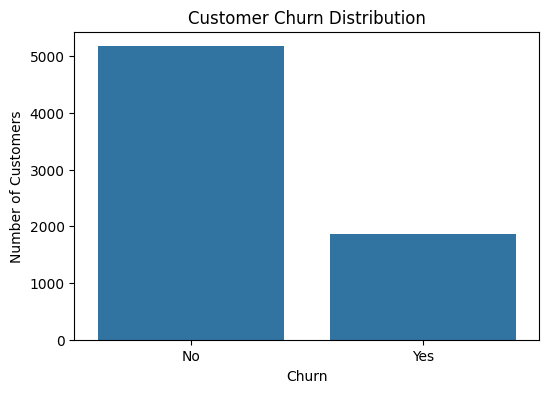

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Label', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

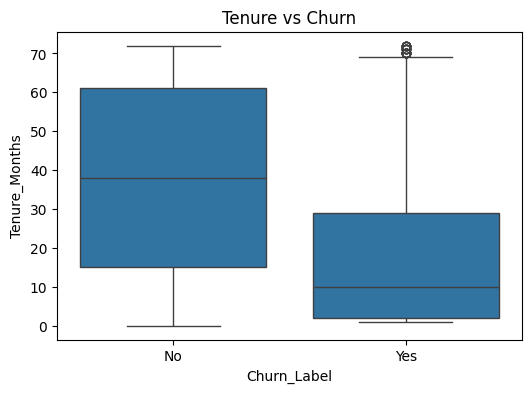

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Label', y='Tenure_Months', data=df)
plt.title("Tenure vs Churn")
plt.show()

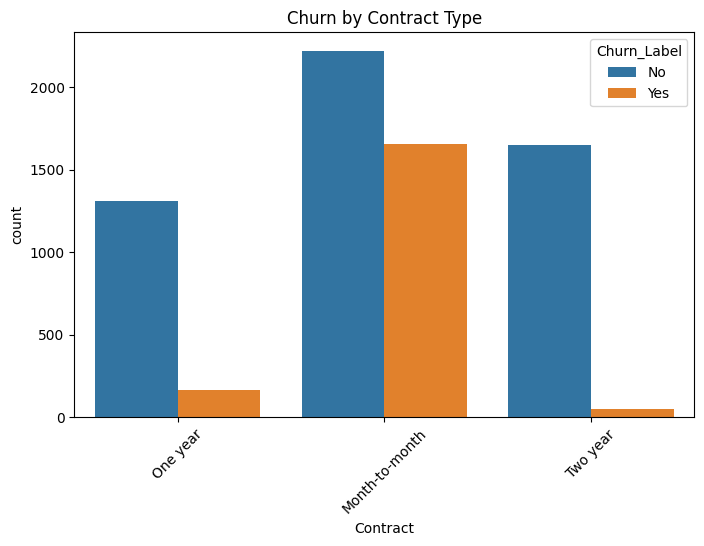

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn_Label', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

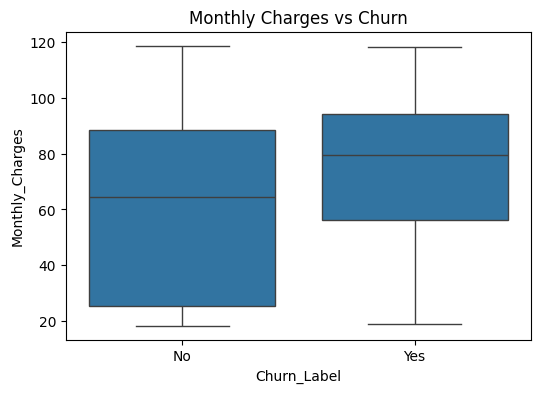

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Label', y='Monthly_Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

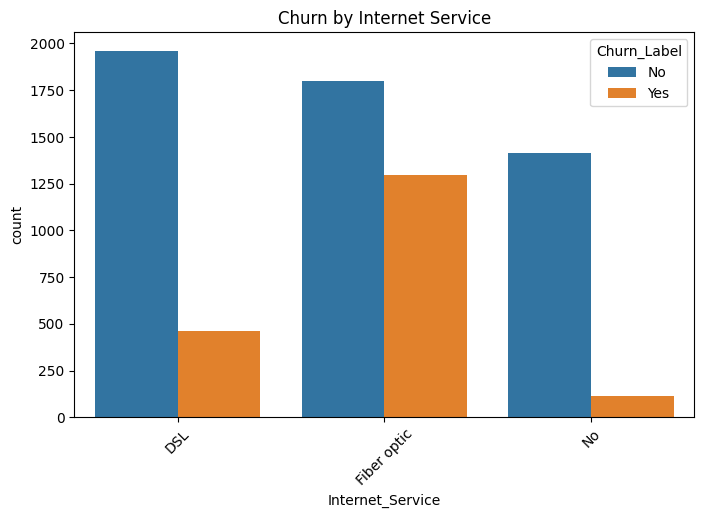

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Internet_Service', hue='Churn_Label', data=df)
plt.title("Churn by Internet Service")
plt.xticks(rotation=45)
plt.show()

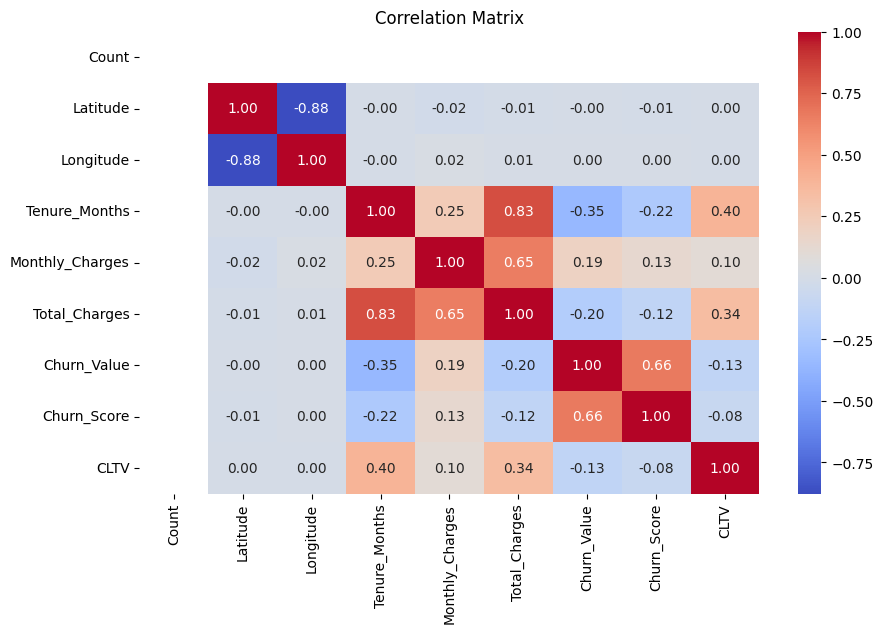

In [16]:
import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), 
            annot=True, 
            cmap="coolwarm",
            fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

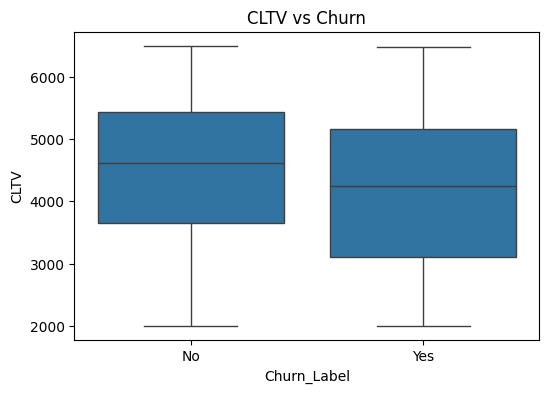

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Label', y='CLTV', data=df)
plt.title("CLTV vs Churn")
plt.show()

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1️⃣ Set Image Save Path
# -------------------------------
save_path = r"C:\customer-churn-analysis-data-analytics\images"

# Create folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# -------------------------------
# 2️⃣ Churn Distribution
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Label', data=df)
plt.title("Customer Churn Distribution")
plt.savefig(os.path.join(save_path, "churn_distribution.png"), dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 3️⃣ Churn by Contract
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn_Label', data=df)
plt.xticks(rotation=45)
plt.title("Churn by Contract Type")
plt.savefig(os.path.join(save_path, "churn_by_contract.png"), dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 4️⃣ Tenure vs Churn
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Label', y='Tenure_Months', data=df)
plt.title("Tenure vs Churn")
plt.savefig(os.path.join(save_path, "tenure_vs_churn.png"), dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 5️⃣ Monthly Charges vs Churn
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Label', y='Monthly_Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.savefig(os.path.join(save_path, "monthly_charges_vs_churn.png"), dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 6️⃣ Internet Service vs Churn
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='Internet_Service', hue='Churn_Label', data=df)
plt.xticks(rotation=45)
plt.title("Churn by Internet Service")
plt.savefig(os.path.join(save_path, "churn_by_internet_service.png"), dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 7️⃣ Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig(os.path.join(save_path, "correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.close()

print("✅ All images saved successfully in:", save_path)

✅ All images saved successfully in: C:\customer-churn-analysis-data-analytics\images


In [20]:
import os
os.listdir(r"C:\customer-churn-analysis-data-analytics\images")

['churn_by_contract.png',
 'churn_by_internet_service.png',
 'churn_distribution.png',
 'correlation_heatmap.png',
 'monthly_charges_vs_churn.png',
 'tenure_vs_churn.png']

In [21]:
# -------------------------------
# CLTV vs Churn
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn_Label', y='CLTV', data=df)
plt.title("CLTV vs Churn")
plt.savefig(os.path.join(save_path, "cltv_vs_churn.png"), dpi=300, bbox_inches='tight')
plt.close()

In [22]:
file_path = os.path.join(save_path, "telecom_churn_cleaned.csv")

df.to_csv(file_path, index=False)

print("✅ Dataset saved successfully at:")
print(file_path)

✅ Dataset saved successfully at:
C:\customer-churn-analysis-data-analytics\images\telecom_churn_cleaned.csv
